In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
import statistics
from matplotlib.patches import FancyArrow
from collections import Counter
import json

plt.rcParams['figure.dpi'] = 900

# 将X/Y轴的刻度线方向设置向内
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# 设置字体
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Microsoft Yahei'
# plt.rcParams['font.family'] = 'Times New Roman'

# 设置公式字体
config = {
    "mathtext.fontset": 'stix',
}
rcParams.update(config)
colors = ['#3a3a8c', '#7daae2', '#fae084', '#f47044', '#cf3d3c', '#a5514e']


# 搜索词组的句子
# def search_phrase(filename, phrase):
#     local_data = []
#     text = []
#     with open('./data/' + filename, 'r', encoding='utf-8') as file:
#         local_data = json.load(file)
#     for ele in local_data:
#         if phrase in ele['phrase']:
#             text.append(ele['text'].strip())
#     return text
    

def appear_times_for_single(data, phrase):
    times = 0
    for i,ele in enumerate(data):
        if phrase in list(ele['phrase'].keys()):
            times += ele['phrase'][phrase]
    return times    


def count_bins(number):
    n_string = '{:.15f}'.format(number)
    decimal_part = str(n_string).split('.')[1]  # 将小数部分转换为字符串并分割
    count = 0
    for digit in decimal_part:
        if digit == '0':
            count += 1
        else:
            break  # 遇到第一个非零数字就停止计数
    return count + 1


# Michel 2007 计算频区间的中心值
def get_center_value(freqs):
    maxi = np.log10(max(freqs))
    minu = np.log10(min(freqs))
    center = (maxi + minu) / 2  # logarithmic mean 对数均值
    return 10**center

##### 选择数据集版本

In [11]:
filename = 'data_realnewslike_01.json'
# filename = 'data_realnewslike_final_1.json'
# filename = 'en_data_final_1.json'

In [12]:
from urllib.parse import urlparse  
  
def get_url_parts(url):  
    result = urlparse(url)  
    return {  
        "scheme": result.scheme,  
        "netloc": result.netloc,  
        "path": result.path,  
        "params": result.params,  
        "query": result.query,  
        "fragment": result.fragment  
    }  
  
url = "https://www.jacksonville.com/opinion/editorials/2011-07-30/story/cost-death-time-tough-talk"  
parts = get_url_parts(url)  
# for k,v in parts.items():
#     print(k, v)
print(parts['netloc'])

www.jacksonville.com


##### 加载Json到内存

In [13]:
local_data = []
with open('./data/'+filename, 'r', encoding='utf-8') as file:
    local_data = json.load(file)
print(len(local_data))
print(local_data[0].keys())
print(local_data[0])

# 统计词组类型
phrases = []

for ele in local_data:
    text = ele['text']
    phrase_list = ele['phrase']
    for p in phrase_list:
        phrases.append(p)


latin_phrases = []
apper_times = {}
# 使用Counter统计元素个数
element_counts = Counter(phrases)
# 按照出现次数降序排序
sorted_counts = sorted(element_counts.items(), key=lambda x: x[1], reverse=True)
# 输出排序结果
for element, count in sorted_counts:
    # print(f"{element}: {count}")
    latin_phrases.append(element)
    apper_times[element] = count

# print(latin_phrases)

# 保存数据集中出现的拉丁词组
# with open('./data/data readability/latin phrases.txt', 'w', encoding='utf-8') as file:
#     for pha in latin_phrases:
#         file.write(pha + '\n')
# file.close()

268900
dict_keys(['text', 'timestamp', 'language', 'phrase', 'url'])
{'text': '"\nInstead of doing what many retailers do, like staffing de facto "product" heads within owned brand development, store operations, e-commerce, etc.', 'timestamp': '2018/06/30', 'language': 'en', 'phrase': ['de facto'], 'url': 'https://www.forbes.com/sites/christopherwalton/2018/06/30/walmart-made-an-incredibly-sharp-move-this-month-hiring-valerie-casey/'}


In [ ]:
print(len(local_data))
website_infos = []
for ele in local_data:
    url = ele['url']
    if len(url) != 0:
        website = get_url_parts(url)['netloc']
        website_infos.append(website)
# 每一条语句都有完整的url
print(len(website_infos))

# 使用Counter统计元素个数
element_counts = Counter(website_infos)
# 按照出现次数降序排序
sorted_counts = sorted(element_counts.items(), key=lambda x: x[1], reverse=True)
print(sorted_counts)
# 保存数据
all_websites, all_websites_count = [], []
for i, (element, count) in enumerate(sorted_counts):
    all_websites.append(element)
    all_websites_count.append(count)
# pd.DataFrame({'website': all_websites, 'count': all_websites_count}).to_csv('./data/data analysis v1.0/top websites count.csv', index=None)

# 输出排序结果
top_websites, top_websites_count= [], []
for i, (element, count) in enumerate(sorted_counts):
    if i >= 25:
        break
    top_websites.append(element)
    top_websites_count.append(count)
print(top_websites)    
    
# 绘图
fig, ax = plt.subplots(figsize=(5, 4))
# 反转 y 轴
ax.invert_yaxis()
# plt.xscale('log')
plt.barh(top_websites, top_websites_count, height=0.8, color='#7da1db')

plt.ylabel('Websites', fontsize=12)
plt.xlabel('Number of statements', fontsize=12)
# 设置 x 轴刻度字体大小
ax.tick_params(axis='x', labelsize=8)
# 设置 y 轴刻度字体大小
ax.tick_params(axis='y', labelsize=8)
# plt.xticks([2000, 6000, 10000])

[('com', 203703), ('org', 18815), ('uk', 12133), ('edu', 7843), ('au', 5174), ('net', 4664), ('ca', 3625), ('za', 2246), ('nz', 1564), ('pk', 1190), ('ie', 1018), ('lk', 902), ('ae', 515), ('us', 411), ('mil', 410), ('in', 404), ('ke', 344), ('de', 313), ('ph', 270), ('sk', 230), ('mt', 224), ('gov', 209), ('my', 197), ('cn', 162), ('int', 161), ('tw', 156), ('ug', 156), ('ge', 152), ('zw', 140), ('tv', 139), ('eg', 134), ('ch', 133), ('sg', 122), ('az', 90), ('tt', 75), ('il', 75), ('am', 64), ('ee', 61), ('bw', 59), ('kr', 55), ('biz', 53), ('lb', 49), ('info', 47), ('it', 46), ('vn', 43), ('sa', 43), ('dk', 38), ('ps', 38), ('tz', 28), ('fi', 28), ('mo', 17), ('hk', 17), ('si', 15), ('bm', 15), ('no', 14), ('co', 13), ('mn', 13), ('cu', 11), ('nl', 11), ('pl', 7), ('edu:8090', 6), ('org:5000', 5), ('ir', 2), ('', 2), ('nu', 1)]
['com', 'org', 'uk', 'edu', 'au', 'net', 'ca', 'za', 'nz', 'pk', 'ie', 'lk', 'ae', 'us', 'mil', 'in', 'ke', 'de', 'ph', 'sk', 'mt', 'gov', 'my', 'cn', 'int']

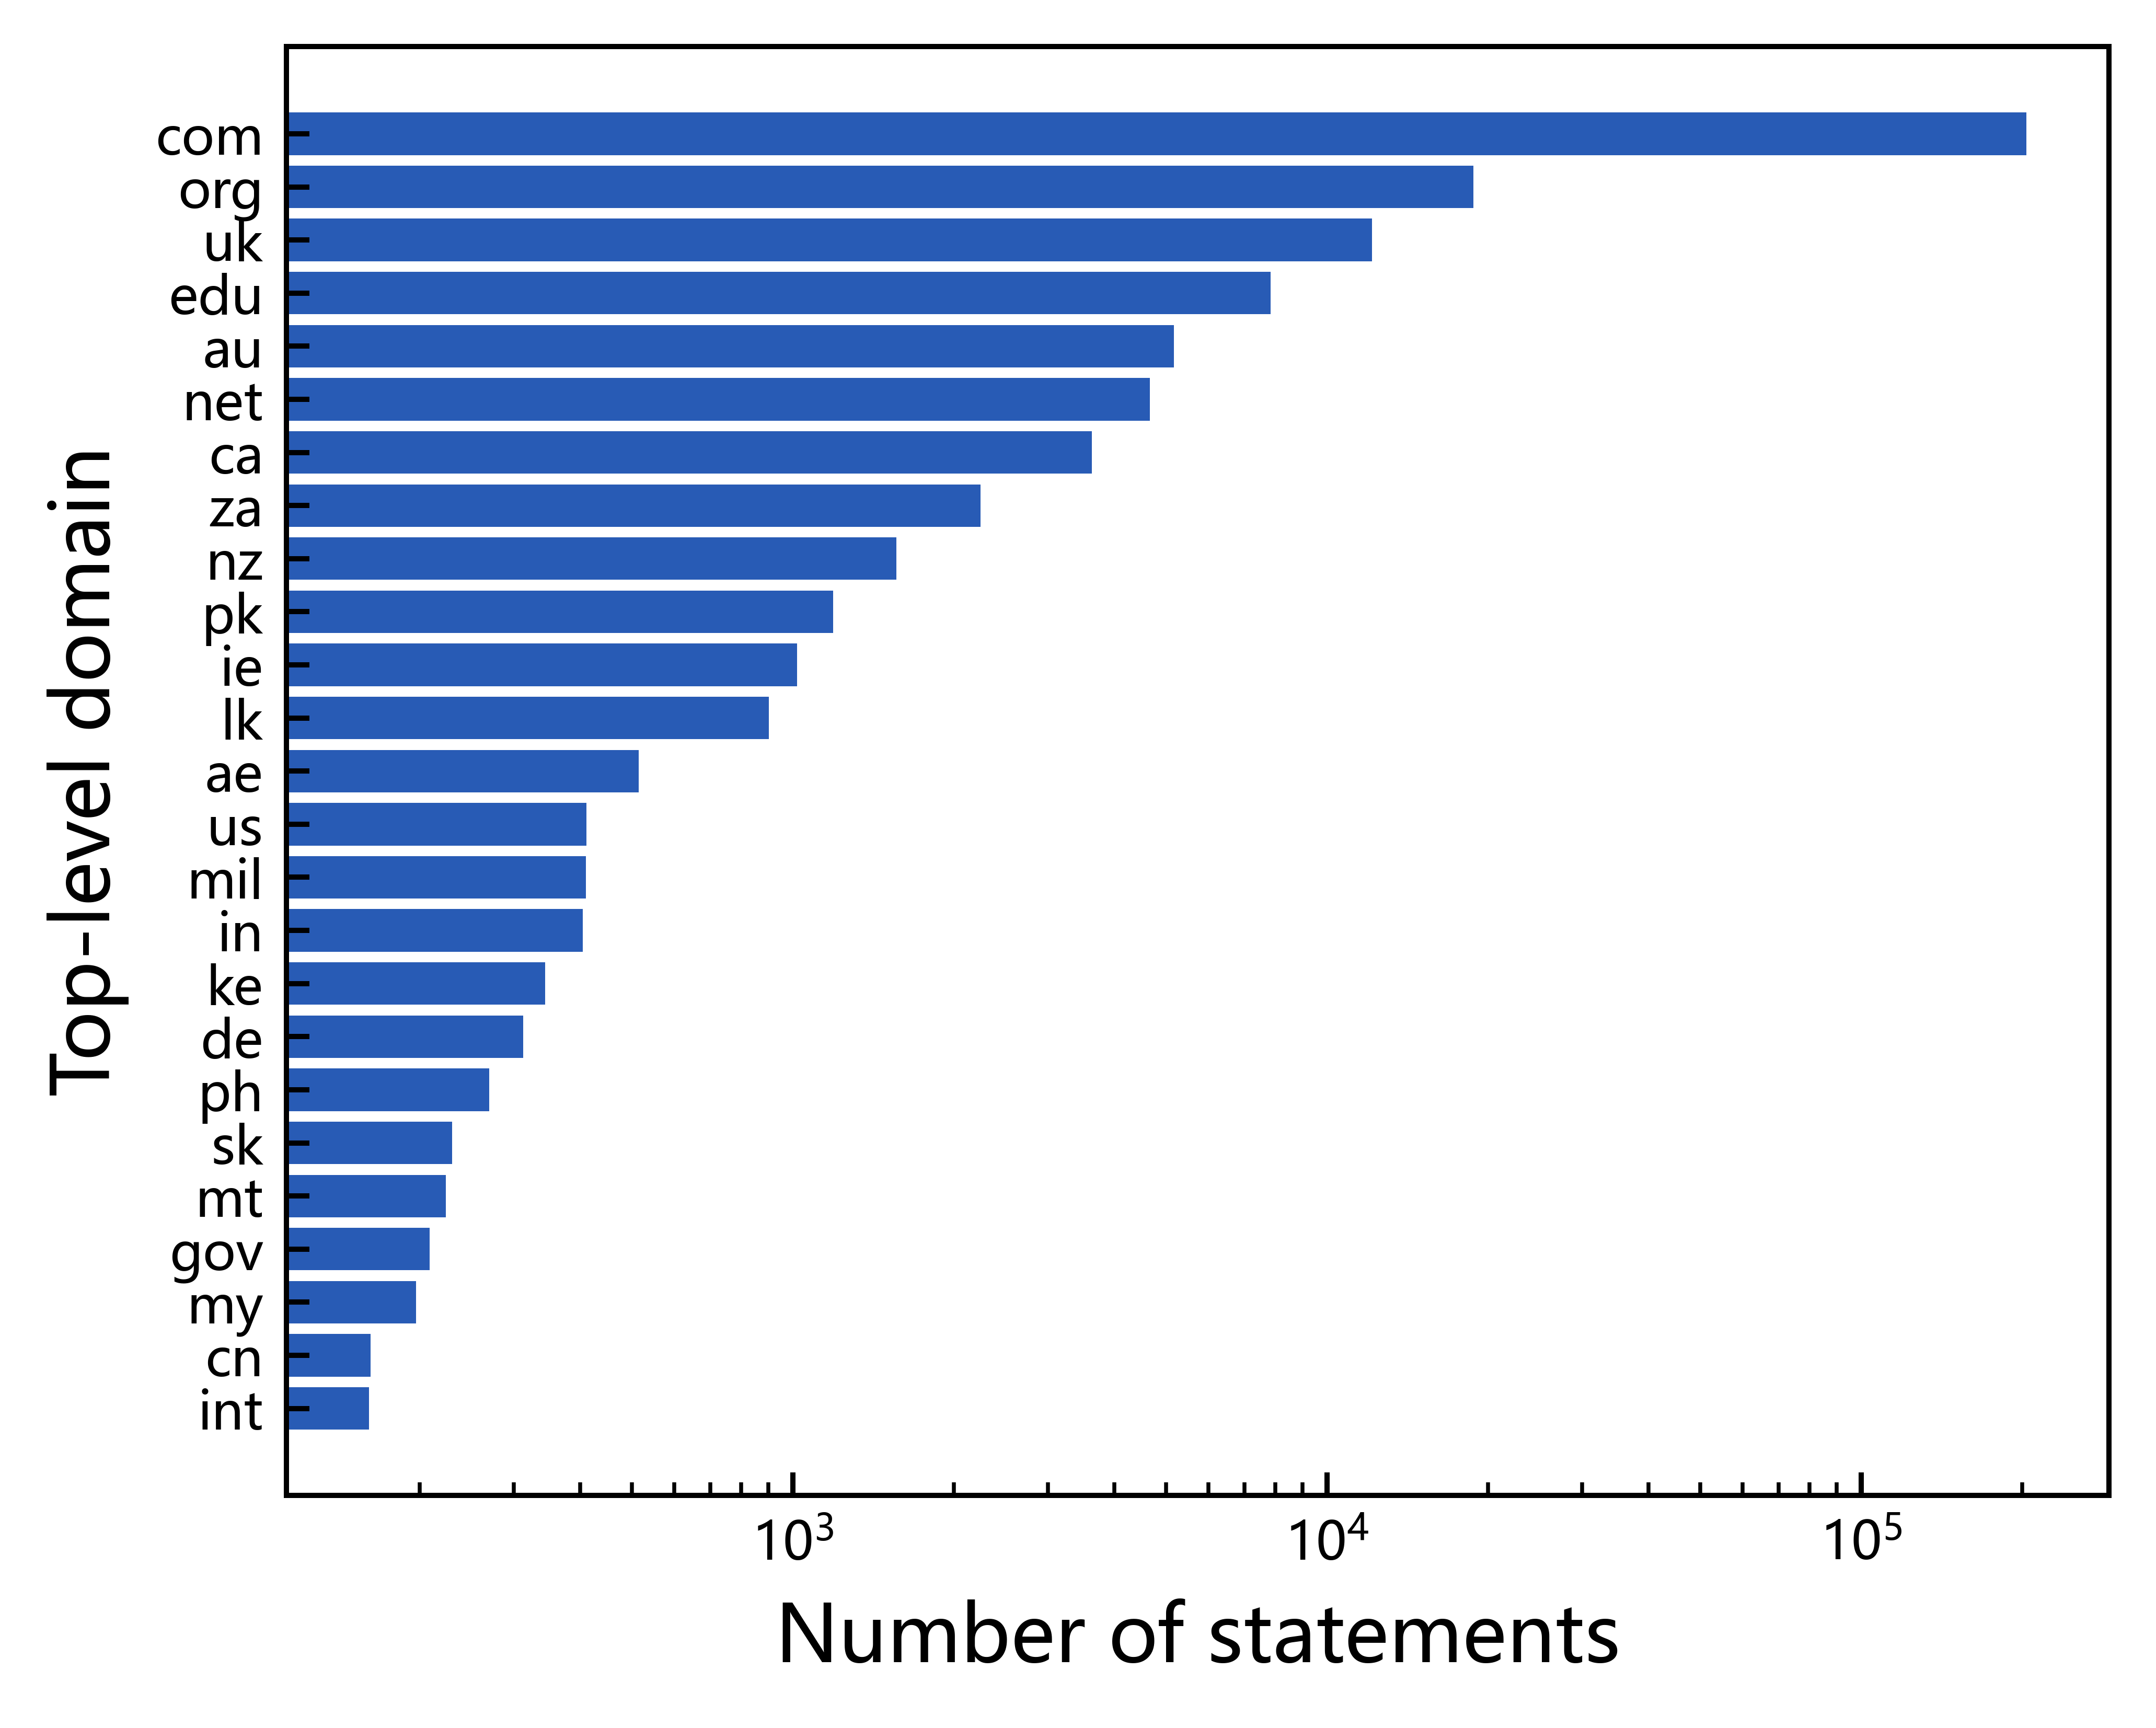

In [ ]:
# 提取域名结尾
domain_infos = [domain.split('.')[-1] for domain in website_infos]

# 使用Counter统计元素个数
element_counts = Counter(domain_infos)
# 按照出现次数降序排序
sorted_counts = sorted(element_counts.items(), key=lambda x: x[1], reverse=True)
print(sorted_counts)
# 保存数据
all_domains, all_domains_count = [], []
for i, (element, count) in enumerate(sorted_counts):
    if len(element) == 0:
        continue
    all_domains.append(element)
    all_domains_count.append(count)
# pd.DataFrame({'domain': all_domains, 'count': all_domains_count}).to_csv('./data/data analysis v1.0/top domains count.csv', index=None)


# 输出排序结果
top_domains = []
top_domains_count = []
for i, (domain, count) in enumerate(sorted_counts):
    if len(element) == 0:
        continue
    if i >= 25:
        break
    top_domains.append(domain)
    top_domains_count.append(count)

print(top_domains)

# 绘图
fig, ax = plt.subplots(figsize=(5, 4))
# 反转 y 轴
ax.invert_yaxis()
plt.xscale('log')
plt.barh(top_domains, top_domains_count, height=0.8, color='#285bb5')

plt.ylabel('Top-level domain', fontsize=12)
plt.xlabel('Number of statements', fontsize=12)
# 设置 x 轴刻度字体大小
ax.tick_params(axis='x', labelsize=8)
# 设置 y 轴刻度字体大小
ax.tick_params(axis='y', labelsize=8)

#### 读取文件绘图

Text(0.45, 0.98, 'b')

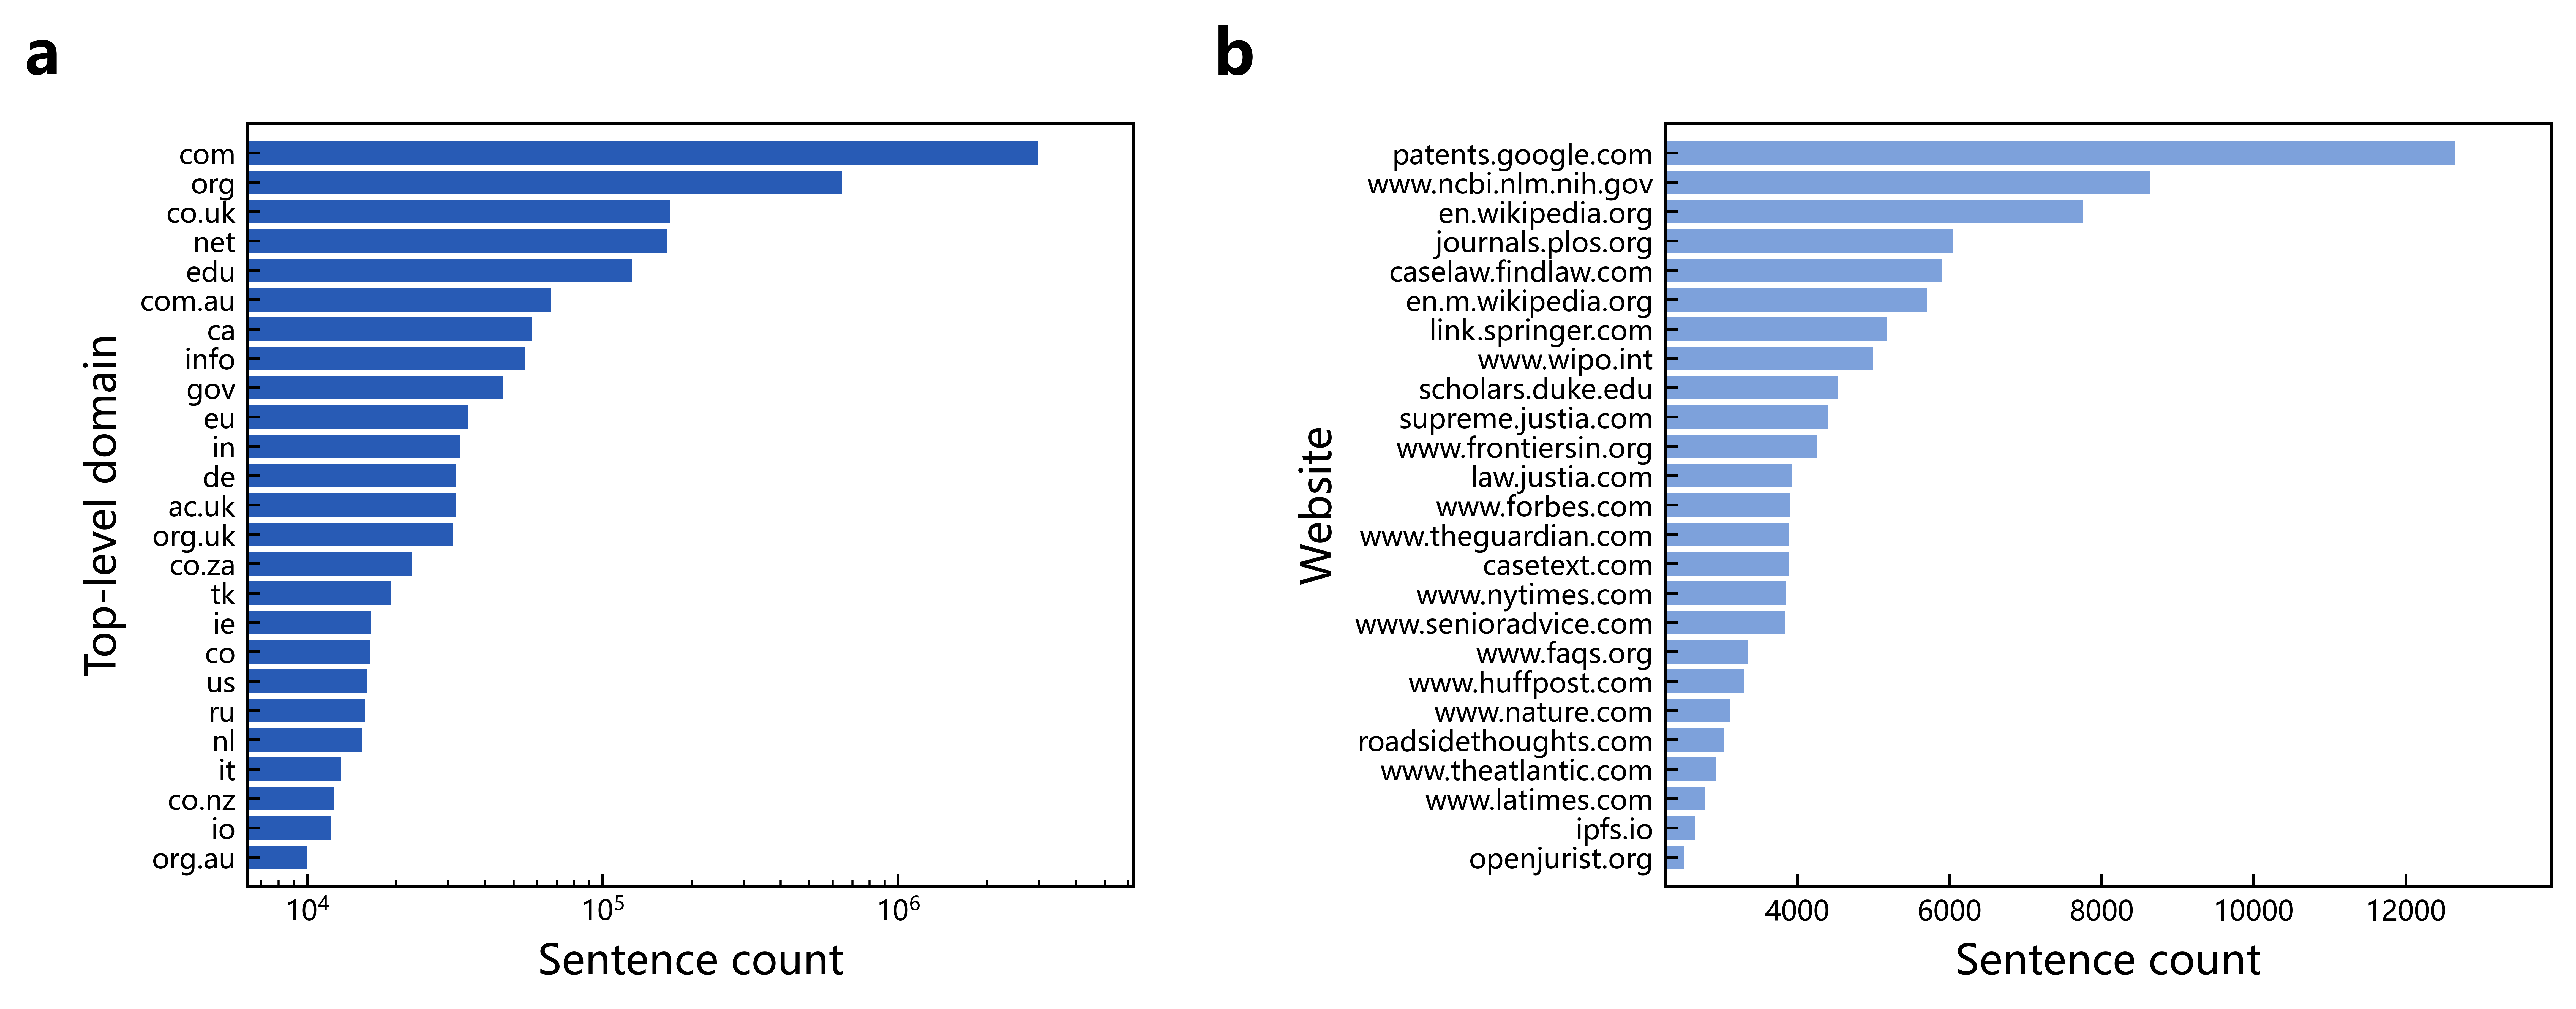

In [ ]:
def plotSubpanel(ax, xvalue, yvalue, is_xscale, color, ylabel):
   # 反转 y 轴
    ax.invert_yaxis()
    # 去除上方和右侧的空白
    ax.margins(0)
    if is_xscale:
        ax.set_xscale('log')
    ax.barh(xvalue, yvalue, height=0.8, color=color)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel('Sentence count', fontsize=12)
    # 设置 x 轴刻度字体大小
    ax.tick_params(axis='x', labelsize=8)
    # 设置 y 轴刻度字体大小
    ax.tick_params(axis='y', labelsize=8)
    # 设置 x/y轴的范围
    if ylabel == 'Top-level domain':
        ax.set_xlim(10**(np.log10(np.min(yvalue))*0.95), 10**(np.log10(np.max(yvalue))*1.05))
    if ylabel == 'Website':
        ax.set_xlim(np.min(yvalue)*0.9, np.max(yvalue)*1.1)
    ax.set_ylim(25, -1)


domain_file_path = './data/data analysis v2.0/top domains count.csv'
website_file_path = './data/data analysis v2.0/top websites count.csv'
df_domain = pd.read_csv(domain_file_path)
df_website = pd.read_csv(website_file_path)

values = [(df_domain['top level domain'], df_domain['count']), (df_website['website'], df_website['count'])]

# fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 1]})
is_xscale = [True, False]
colors = ['#285bb5', '#7da1db']
ylabels = ['Top-level domain', 'Website']

for i, (ax, value, flag, color, ylabel) in enumerate(zip(axs, values, is_xscale, colors, ylabels)):
    # 获取前25的数据
    xvals, yvals = value
    xvalue, yvalue = [], []
    for i, (x, y) in enumerate(zip(xvals, yvals)):
        if i >= 25:
            break
        xvalue.append(x)
        yvalue.append(y)
    plotSubpanel(ax, xvalue, yvalue, flag, color, ylabel)
    
fig.subplots_adjust(wspace=0.6, hspace=0.22)
# 添加字母
fig.text(0.05, 0.98, 'a', fontsize=18, va='top', fontweight='bold')
fig.text(0.45, 0.98, 'b', fontsize=18, va='top', fontweight='bold')

In [ ]:
def dot_decimal_to_decimal(ip_address):
    parts = ip_address.split('.')
    decimal_ip = 0

    for i in range(4):
        decimal_ip += int(parts[i]) * (256 ** (3 - i))

    return decimal_ip

ip_address = '192.168.0.1'
decimal_ip = dot_decimal_to_decimal(ip_address)
print(decimal_ip)  # 输出：3232235521

3232235521


#### Geolocation 定位: 判断这些url是来自于哪些国家

In [ ]:
def dot_decimal_to_decimal(ip_address):
    parts = ip_address.split('.')
    decimal_ip = 0

    for i in range(4):
        decimal_ip += int(parts[i]) * (256 ** (3 - i))

    return decimal_ip

ip_address = '192.168.0.1'
decimal_ip = dot_decimal_to_decimal(ip_address)
print(decimal_ip)  # 输出：3232235521

3232235521


In [ ]:
import socket

def get_ip_address(url):
    try:
        ip_address = socket.gethostbyname(url)
        return ip_address
    except socket.gaierror:
        return None

# 示例用法
url = "www.nytimes.com"
ip_address = get_ip_address(url)
if ip_address:
    print(f"The IP address of {url} is {ip_address}")
else:
    print(f"Failed to retrieve the IP address of {url}")

The IP address of www.nytimes.com is 162.125.32.6


In [ ]:
import ipaddress

def get_address_type(address):
    try:
        ip = ipaddress.ip_address(address)
        if isinstance(ip, ipaddress.IPv4Address):
            return "IPv4"
        elif isinstance(ip, ipaddress.IPv6Address):
            return "IPv6"
        else:
            return "Unknown"
    except ValueError:
        return "Invalid"

# 示例用法
address1 = "192.168.0.1"
address2 = "2001:0db8:85a3:0000:0000:8a2e:0370:7334"
address3 = "invalid_address"

type1 = get_address_type(address1)
type2 = get_address_type(address2)
type3 = get_address_type(address3)

print(f"{address1} is {type1}")
print(f"{address2} is {type2}")
print(f"{address3} is {type3}")

192.168.0.1 is IPv4
2001:0db8:85a3:0000:0000:8a2e:0370:7334 is IPv6
invalid_address is Invalid


In [ ]:
import ipaddress

def ipv6_to_decimal(address):
    try:
        ip = ipaddress.ip_address(address)
        decimal = int(ip)
        return decimal
    except ValueError:
        return None

# 示例用法
ipv6_address = "2001:0db8:85a3:0000:0000:8a2e:0370:7334"

decimal = ipv6_to_decimal(ipv6_address)
if decimal is not None:
    print(f"The decimal representation of {ipv6_address} is {decimal}")
else:
    print(f"Failed to convert {ipv6_address} to decimal")

The decimal representation of 2001:0db8:85a3:0000:0000:8a2e:0370:7334 is 42540766452641154071740215577757643572


In [ ]:
# 将ipv4转变成十进制
def ipv4_to_decimal(address):
    parts = address.split('.')
    decimal_ip = 0
    for i in range(4):
        decimal_ip += int(parts[i]) * (256 ** (3 - i))
    return decimal_ip

# 将ipv6转变成十进制
import ipaddress

def ipv6_to_decimal(address):
    try:
        ip = ipaddress.ip_address(address)
        decimal = int(ip)
        return decimal
    except ValueError:
        return None
    
# 将url转换为ip地址
import socket

def get_ip_address(url):
    try:
        ip_address = socket.gethostbyname(url)
        return ip_address
    except socket.gaierror:
        return None
    
    
# 判断是ipv4还是ipv6
import ipaddress

def get_address_type(address):
    try:
        ip = ipaddress.ip_address(address)
        if isinstance(ip, ipaddress.IPv4Address):
            return "IPv4"
        elif isinstance(ip, ipaddress.IPv6Address):
            return "IPv6"
        else:
            return "Unknown"
    except ValueError:
        return "Invalid"


df_ipv4 = pd.read_csv('./data/IP-country database/IP2LOCATION-LITE-DB1.IPV4.CSV', header=None)
df_ipv6 = pd.read_csv('./data/IP-country database/IP2LOCATION-LITE-DB1.IPV6.CSV', header=None)

print(df_ipv4.shape, df_ipv6.shape)
ipv4_country, ipv6_country = [], []

for (start_ip, end_ip, region_conde, country) in zip(df_ipv4[0], df_ipv4[1], df_ipv4[2], df_ipv4[3]):
    ipv4_country.append((start_ip, end_ip, region_conde, country))
    
for (start_ip, end_ip, region_conde, country) in zip(df_ipv6[0], df_ipv6[1], df_ipv6[2], df_ipv6[3]):
    ipv6_country.append((start_ip, end_ip, region_conde, country))
        
print(len(ipv4_country), len(ipv6_country))

C:\Users\leisaihua\AppData\Local\Temp\ipykernel_13088\3176108261.py:47: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ipv6 = pd.read_csv('./data/IP-country database/IP2LOCATION-LITE-DB1.IPV6.CSV', header=None)


(249829, 4) (580751, 4)
249829 580751


In [ ]:
df_website = pd.read_csv('./data/data analysis v1.0/top websites count.csv')
# 保存国家定位数据
all_ip_country = {}


websites = df_website['website']
counts = df_website['count']
for i, (url, count) in enumerate(zip(websites, counts)):
    # if i > 100:
    #     break
    # 将IP地址转换成十进制
    decimal = 0
    ip_country = []
    # 获取IP地址
    ip_address = get_ip_address(url)
    # 判断是IPv4还是IPv6
    address_type = get_address_type(ip_address)
    if address_type == 'IPv4':
        decimal = ipv4_to_decimal(ip_address)
        ip_country = ipv4_country
    elif address_type == 'IPv6':
        decimal = ipv6_to_decimal(ip_address)
        ip_country = ipv6_country
    # print(i, url, ip_address, address_type, country)
    
    for ele in ip_country:
        start_ip, end_ip, region_conde, country = ele
        # print(start_ip, end_ip)
        if start_ip <= decimal <= end_ip:
            print(i, url, ip_address, address_type, country)
            # print(region_conde, country)
            # 添加到列表中
            if country not in all_ip_country.keys():
                all_ip_country[country] = count
            else:
                new_count = count + all_ip_country[country]
                all_ip_country[country] = new_count
        elif decimal < end_ip:
            break
print(all_ip_country)

#### 分割数据集

In [ ]:
df = pd.read_csv('./data/data analysis v2.0/top websites count.csv')
# 假设df为要分割的DataFrame
df_splits = np.array_split(df, 10)
for i, df_ele in enumerate(df_splits):
    print(type(df_ele))
    df_ele.to_csv('./data/data analysis v2.0/top websites small files/top websites file'+ str(i) +'.csv', index=None)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


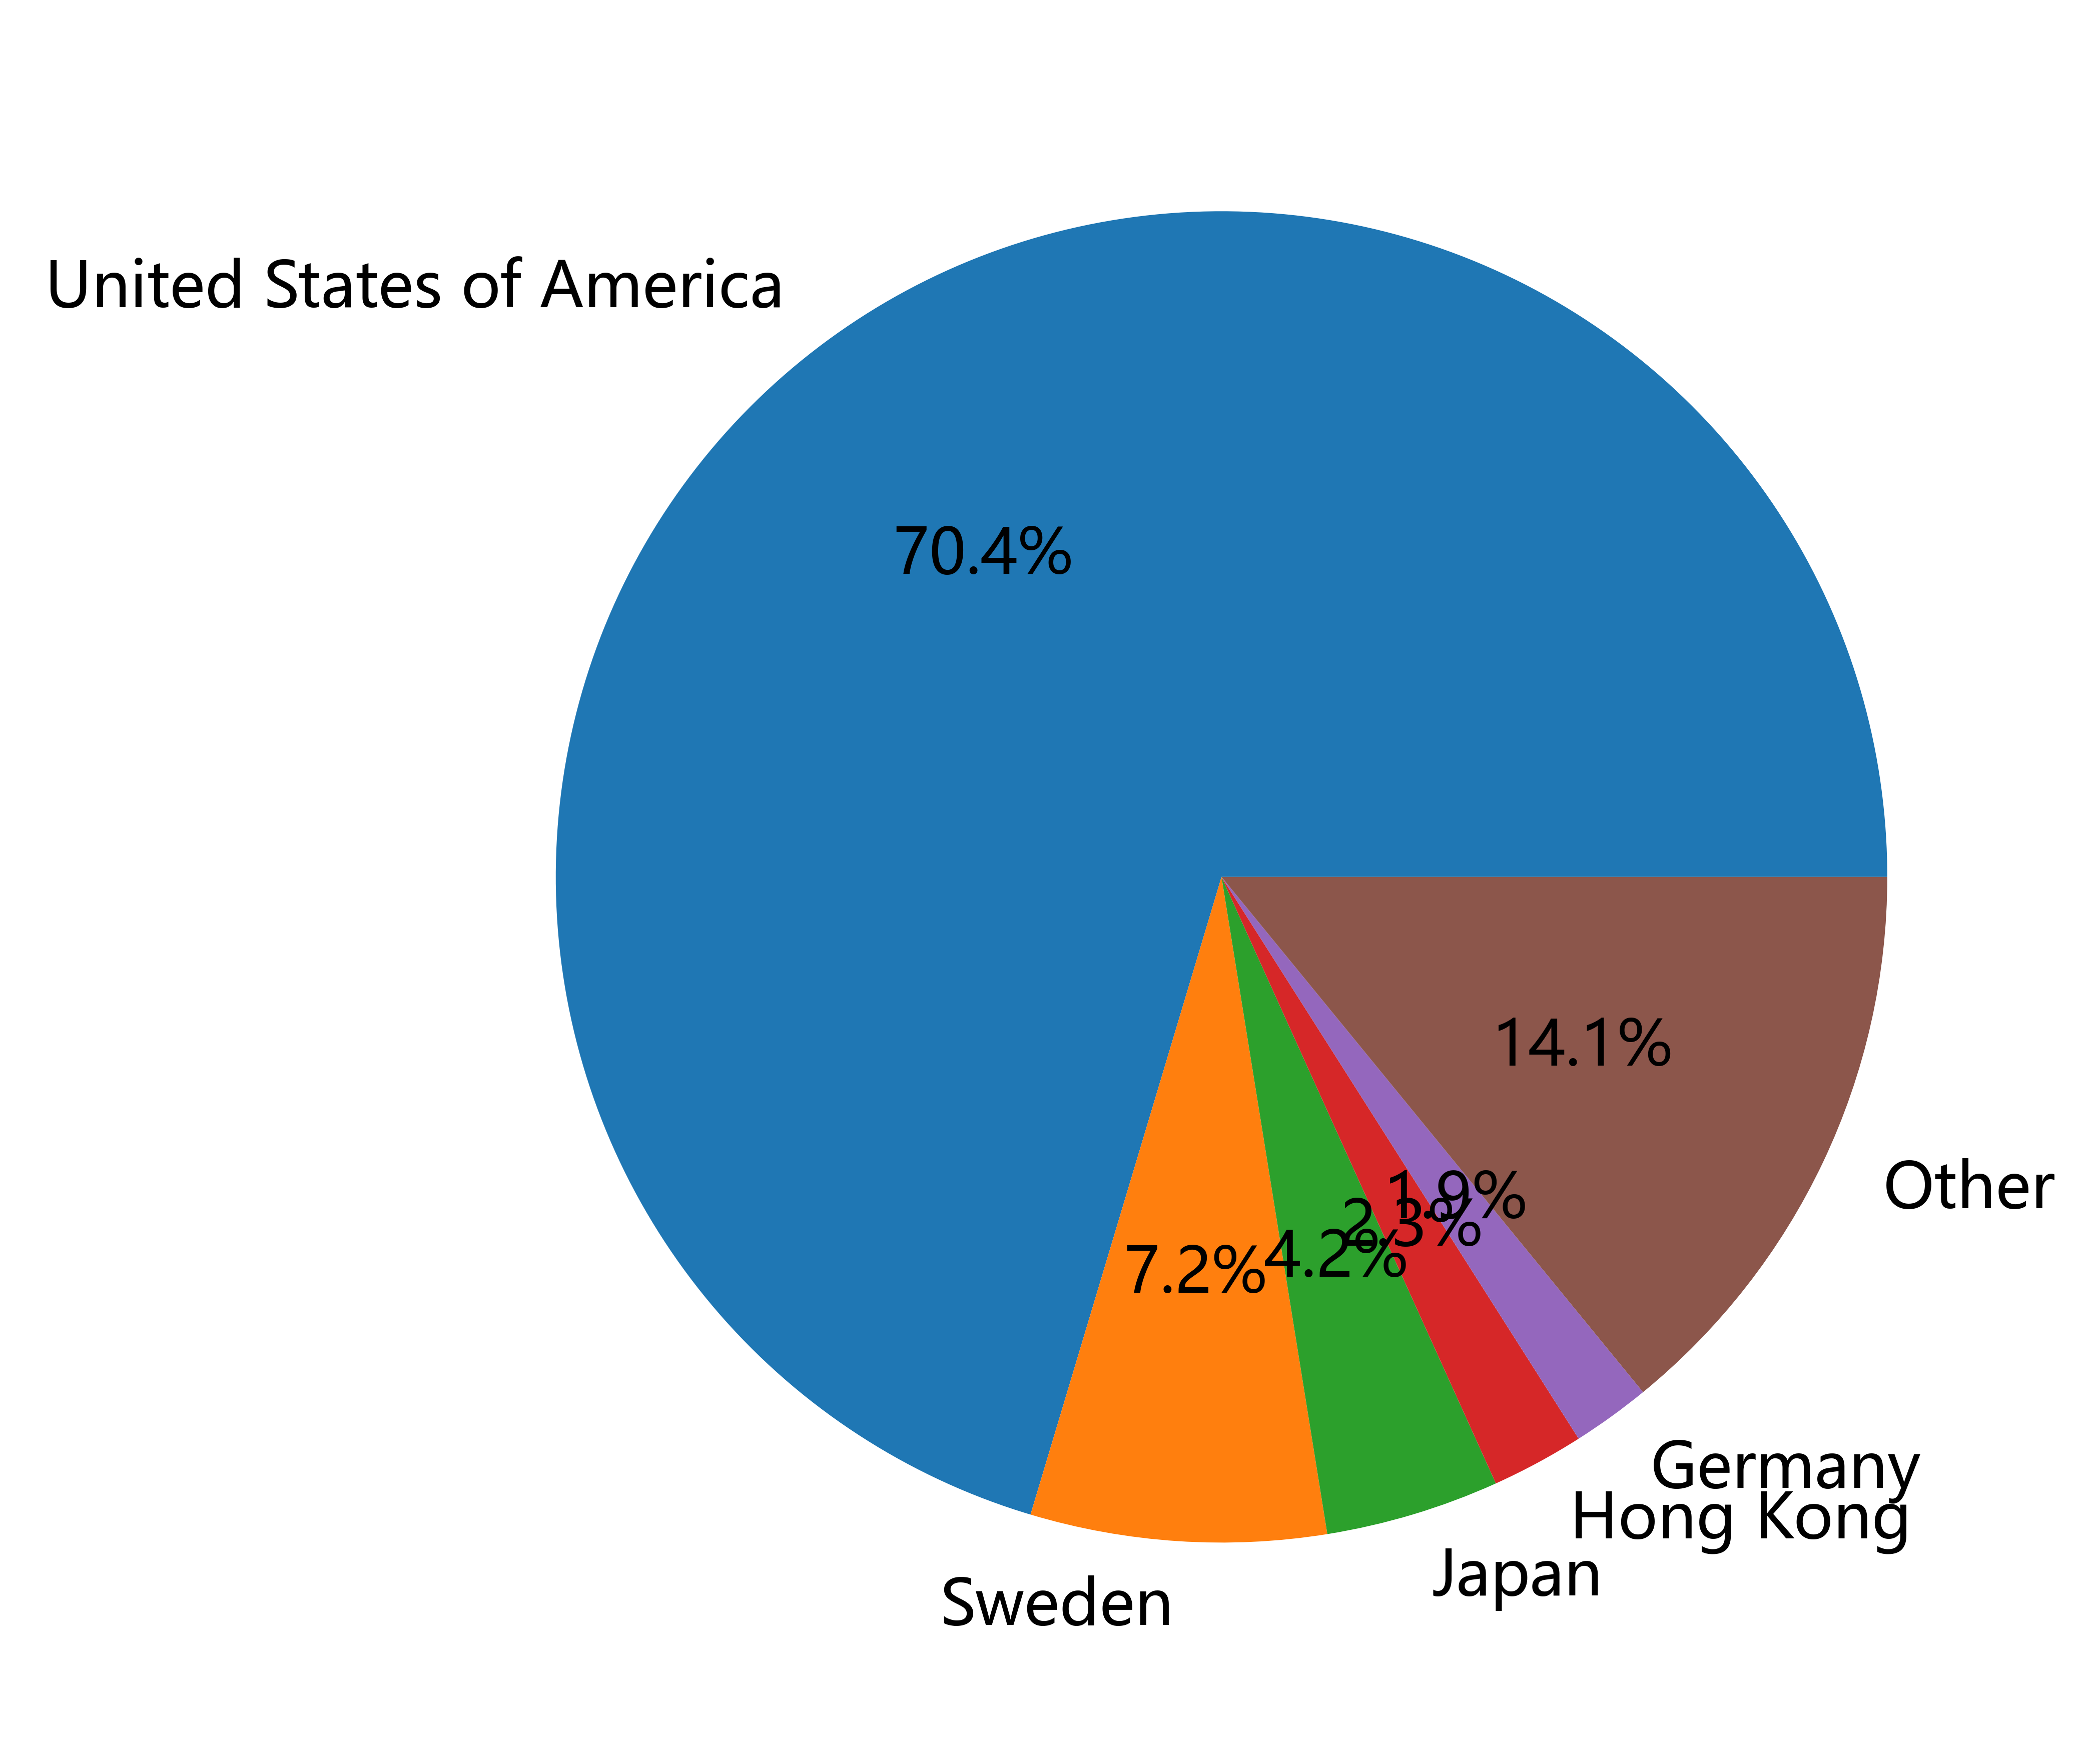

In [ ]:
df = pd.read_csv('./data/data analysis v1.0/ip-country count.csv')
# 获取前10个国家
top_10 = df.nlargest(5, 'count')

# 计算剩余国家的总和
other_sum = df.loc[~df['country'].isin(top_10['country']), 'count'].sum()

# 创建一个包含'Other'的行，并将剩余国家的总和添加到'Value'列
other_row = pd.DataFrame({'country': ['Other'], 'count': [other_sum]})

# 合并前10个国家和'Other'行
result = pd.concat([top_10, other_row])

# 输出结果
# print(result)


# 准备数据
labels = result['country']
sizes = result['count']

# 绘制饼状图
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# 展示图表
plt.show()

#### 使用top level domain进行国家地区统计分析

In [ ]:
import tldextract
from tqdm import tqdm

def get_domain_parts(domain):
    extracted = tldextract.extract(domain)
    top_level_domain = extracted.suffix = extracted.suffix
    tld = extracted.suffix
    flag = False
    if len(tld) == 2:
        flag = True
    return top_level_domain, flag

top_level_domains_count = {}
website_file_path = './data/data analysis v2.0/top websites count.csv'
df_website = pd.read_csv(website_file_path)

# 使用tqdm创建进度条，并设置总任务数
progress_bar = tqdm(total=len(df_website), desc='Progress', unit='task')

for i,(website, count) in enumerate(zip(df_website['website'], df_website['count'])):
    # 进度条加 1
    progress_bar.update(1)
    # if i > 10000:
    #     break
    top_level_domain, flag = get_domain_parts(website)
    # if flag:
    # print(website, top_level_domain, flag)
    if top_level_domain not in top_level_domains_count.keys():
        top_level_domains_count[top_level_domain] = count
    else:
        N = top_level_domains_count[top_level_domain]
        top_level_domains_count[top_level_domain] = N + count
# 关闭进度条
progress_bar.close()

sorted_domains_count = sorted(top_level_domains_count.items(), key=lambda x: x[1], reverse=True)
# for i, ele in enumerate(sorted_domains_count):
#     if i > 25:
#         break
#     print(ele)

# # 保存文件
# domains, counts = [], []
# for i, ele in enumerate(sorted_domains_count):
#     do, co = ele
#     domains.append(do)
#     counts.append(co)
# pd.DataFrame({'top level domain': domains, 'count': counts}).to_csv('./data/data analysis v2.0/top domains count.csv', index=None)

Progress: 100%|██████████| 1413113/1413113 [00:06<00:00, 207325.35task/s]


In [ ]:
domain_infos = []
for i,(website, count) in enumerate(zip(df_website['website'], df_website['count'])):
    do = website.split('.')[-1]
    for i in range(0, count):
        domain_infos.append(do)


# 使用Counter统计元素个数
element_counts = Counter(domain_infos)
# 按照出现次数降序排序
sorted_counts = sorted(element_counts.items(), key=lambda x: x[1], reverse=True)
print(sorted_counts)
# 保存数据
all_domains, all_domains_count = [], []
for i, (element, count) in enumerate(sorted_counts):
    if len(element) == 0:
        continue
    all_domains.append(element)
    all_domains_count.append(count)
print(all_domains)

[('com', 2973670), ('org', 644191), ('uk', 244399), ('net', 165554), ('edu', 125893), ('au', 97623), ('ca', 61014), ('info', 54733), ('gov', 45870), ('in', 43599), ('eu', 35161), ('de', 31793), ('za', 28760), ('nz', 20403), ('us', 20203), ('tk', 19259), ('co', 16627), ('ie', 16553), ('ru', 15743), ('nl', 15357), ('it', 13217), ('io', 12017), ('fr', 10031), ('ch', 8860), ('me', 8819), ('blog', 8727), ('pl', 7911), ('jp', 7835), ('sg', 7782), ('int', 6914), ('be', 6849), ('se', 6624), ('cn', 6351), ('biz', 5985), ('es', 5405), ('cz', 5387), ('tv', 4879), ('br', 4854), ('ng', 4568), ('ph', 4280), ('my', 4216), ('at', 3954), ('pk', 3926), ('dk', 3653), ('no', 3305), ('fi', 3125), ('hk', 3112), ('ro', 3040), ('ir', 2986), ('gr', 2958), ('il', 2834), ('ua', 2752), ('xyz', 2512), ('kr', 2375), ('lk', 2216), ('pt', 2133), ('hu', 1910), ('tw', 1885), ('news', 1860), ('vn', 1851), ('ml', 1841), ('id', 1813), ('ar', 1787), ('ae', 1728), ('ga', 1681), ('club', 1645), ('ke', 1521), ('is', 1499), ('

#### 从网站中分析国家信息

In [ ]:
ip_country_dict = {}

for i in range(10):
    # if i == 1:
    #     continue
    filepath = './data/data analysis v2.0/top websites small files/out-counts v1.2/websites count file'+ str(i) +'.csv'
    df = pd.read_csv(filepath)
    for country, count in zip(df['country'], df['count']):
        if country not in ip_country_dict.keys():
            ip_country_dict[country] = count
        else:
            N = ip_country_dict[country]
            ip_country_dict[country] = N + count
# sort
sorted_ip_country = sorted(ip_country_dict.items(), key=lambda x: x[1], reverse=True)
# print(sorted_ip_country)
top_country, top_country_count = [], []
for i, ele in enumerate(sorted_ip_country):
    country, count = ele
    if i >= 50:
        break
    # print(country, count)
    top_country.append(country)
    top_country_count.append(count)
    
# pd.DataFrame({'country': top_country, 'count': top_country_count}).to_csv('./utils/geopandas/country_count v1.2.csv', index=None)

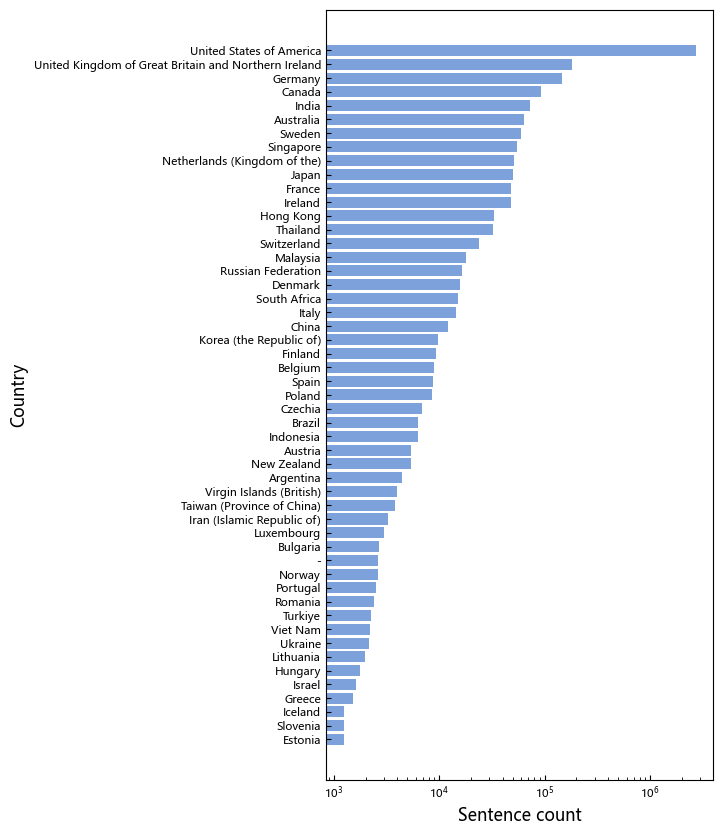

In [ ]:
# 绘图
fig, ax = plt.subplots(figsize=(5, 10))
# 反转 y 轴
ax.invert_yaxis()
plt.xscale('log')
plt.barh(top_country, top_country_count, height=0.8, color='#7da1db')

plt.ylabel('Country', fontsize=12)
plt.xlabel('Sentence count', fontsize=12)
# 设置 x 轴刻度字体大小
ax.tick_params(axis='x', labelsize=8)
# 设置 y 轴刻度字体大小
ax.tick_params(axis='y', labelsize=8)
# plt.xticks([2000, 6000, 10000])

#### 根据Geopandas的国家命名，统计分布

In [ ]:
df_ip_country = pd.read_csv('utils/geopandas/website_country_count v1.2.csv')
df_geo_ip = pd.read_csv('utils/geopandas/geo_ip_country_llama3.csv')

geo_countries_count = {}
# 保存国家数据，绘制世界地图
countries, counts = [], []

for i, (geo_country, ip_country) in enumerate(zip(df_geo_ip['geo_country'], df_geo_ip['ip_country'])):
    # if i > 25:
    #     break
    # for j, (con, count) in enumerate(zip(df_ip_country['country'], df_ip_country['count'])):
    #     if ip_country == con:
    #         print(count)
    ip_country_count = df_ip_country.loc[df_ip_country['country'] == ip_country, 'count'].values[0]
    # print(geo_country, ip_country_count)
    geo_countries_count[geo_country] = ip_country_count
    countries.append(geo_country)
    counts.append(ip_country_count)
# save
pd.DataFrame({'country': countries, 'count': counts}).to_csv('utils/geopandas/geo_countries_count.csv', index=None)

# sort: 字典按照key排序
sorted_geo_countries = dict(sorted(geo_countries_count.items(), key=lambda x: x[1], reverse=True))

In [1]:
top_country, top_country_count = [], []
for i, (k, v) in enumerate(sorted_geo_countries.items()):
    if i >= 50:
        break
    top_country.append(k)
    top_country_count.append(v)

print(len(top_country))

# 绘图
fig, ax = plt.subplots(figsize=(5, 8))
# 反转 y 轴
ax.invert_yaxis()
# 去除上方和右侧的空白
ax.margins(0)

plt.xscale('log')
plt.barh(top_country, top_country_count, height=0.8, color='#7da1db')

plt.ylabel('Country', fontsize=12)
plt.xlabel('Sentence count', fontsize=12)
# 设置 x 轴刻度字体大小
ax.tick_params(axis='x', labelsize=8)
# 设置 y 轴刻度字体大小
ax.tick_params(axis='y', labelsize=8)
# plt.xticks([2000, 6000, 10000])
# 设置 x/y轴的范围
plt.xlim(10**(np.log10(np.min(top_country_count))*0.95), 10**(np.log10(np.max(top_country_count))*1.05))
plt.ylim(50, -1)

NameError: name 'sorted_geo_countries' is not defined

#### 使用平均化方法计算website-country

In [2]:
# 将ipv4转变成十进制
def ipv4_to_decimal(address):
    parts = address.split('.')
    decimal_ip = 0
    for i in range(4):
        decimal_ip += int(parts[i]) * (256 ** (3 - i))
    return decimal_ip

# 将ipv6转变成十进制
import ipaddress

def ipv6_to_decimal(address):
    try:
        ip = ipaddress.ip_address(address)
        decimal = int(ip)
        return decimal
    except ValueError:
        return None
    
# 将url转换为ip地址
import socket

def get_ip_address(url):
    try:
        ip_address = socket.gethostbyname(url)
        return ip_address
    except socket.gaierror:
        return None
    
    
# 判断是ipv4还是ipv6
import ipaddress

def get_address_type(address):
    try:
        ip = ipaddress.ip_address(address)
        if isinstance(ip, ipaddress.IPv4Address):
            return "IPv4"
        elif isinstance(ip, ipaddress.IPv6Address):
            return "IPv6"
        else:
            return "Unknown"
    except ValueError:
        return "Invalid"

df_ipv4 = pd.read_csv('./data/IP-country database/IP2LOCATION-LITE-DB1.IPV4.CSV', header=None)
df_ipv6 = pd.read_csv('./data/IP-country database/IP2LOCATION-LITE-DB1.IPV6.CSV', header=None)

print(df_ipv4.shape, df_ipv6.shape)
ipv4_country, ipv6_country = [], []

for (start_ip, end_ip, region_conde, country) in zip(df_ipv4[0], df_ipv4[1], df_ipv4[2], df_ipv4[3]):
    ipv4_country.append((start_ip, end_ip, region_conde, country))
    
for (start_ip, end_ip, region_conde, country) in zip(df_ipv6[0], df_ipv6[1], df_ipv6[2], df_ipv6[3]):
    ipv6_country.append((start_ip, end_ip, region_conde, country))
        
print(len(ipv4_country), len(ipv6_country))

C:\Users\leisaihua\AppData\Local\Temp\ipykernel_22180\3176108261.py:47: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ipv6 = pd.read_csv('./data/IP-country database/IP2LOCATION-LITE-DB1.IPV6.CSV', header=None)


(249829, 4) (580751, 4)
249829 580751


In [3]:
# 在有序的 Ip列表 ranges中找到 tager对应的Ip位置（二分查找）
def get_ipindex_in_ip_country(ranges, target):
    left = 0
    right = len(ranges) - 1

    while left <= right:
        mid = (left + right) // 2
        curr_range = ranges[mid]
        if target >= curr_range[0] and target < curr_range[1]:
            return mid
        elif target < curr_range[0]:
            right = mid - 1
        else:
            left = mid + 1

    return left

# ipv4和ipv6的 ip范围
ipv4_country_ranges, ipv6_country_ranges = [], []
for ele in ipv4_country:
    start_ip, end_ip, region_conde, country = ele
    ipv4_country_ranges.append((start_ip, end_ip))
    
for ele in ipv6_country:
    start_ip, end_ip, region_conde, country = ele
    ipv6_country_ranges.append((start_ip, end_ip))

print(len(ipv4_country_ranges), len(ipv6_country_ranges))

249829 580751


In [4]:
from tqdm import tqdm


df_website = pd.read_csv('./data/data analysis v1.0/top websites count.csv')
# 保存国家定位数据，形式如下: [(country, website, count)]
country_website_count_list = []
# country_website_count_dict = {}
error_times = 0

websites = df_website['website']
counts = df_website['count']
progress_bar = tqdm(total=len(websites), desc='Progress', unit='task')
for i, (url, count) in enumerate(zip(websites, counts)):
    try:
        progress_bar.update(1)
        # if i >= 1000:
        #     break
        # 将IP地址转换成十进制
        decimal = 0
        # Ip-country对应的地址
        ip_country_ranges = []
        # 获取IP地址
        ip_address = get_ip_address(url)
        # 判断是IPv4还是IPv6
        address_type = get_address_type(ip_address)
        if address_type == 'IPv4':
            decimal = ipv4_to_decimal(ip_address)
            ip_country_ranges  = ipv4_country_ranges 
        elif address_type == 'IPv6':
            decimal = ipv6_to_decimal(ip_address)
            ip_country_ranges  = ipv6_country_ranges 
        # print(i, url, ip_address, address_type, country)
        
        ip_index = get_ipindex_in_ip_country(ip_country_ranges, decimal)
        # print(decimal, ipv4_country[ip_index])
        start_ip, end_ip, region_conde, country = ipv4_country[ip_index]
        
        country_website_count_list.append((country, url, count))
    except Exception as e:
        error_times += 1
        pass

progress_bar.close()

print('url analyse error times: ', error_times)
print(len(country_website_count_list))

Progress:   0%|          | 0/5849 [00:00<?, ?task/s]

Progress: 100%|██████████| 5849/5849 [29:54<00:00,  3.26task/s]  

url analyse error times:  2
5847


In [ ]:
# 保存国家定位数据，形式如下: {country: {website: count}}
country_website_count_dict = {}
for ele in country_website_count_list:
    country, url, count = ele
    # 网站所属国家
    website_country = country
    # 表示字典中没有记录该国家的信息
    if website_country not in country_website_count_dict.keys():
        country_website_count_dict[website_country] = {url: count}
    else:
        # 如果记录该国家信息，查看是否有记录该网站信息
        if url not in country_website_count_dict[website_country].keys():
            country_website_count_dict[website_country][url] = count
        else:
            N = country_website_count_dict[website_country][url]
            country_website_count_dict[website_country][url] = N + count
            
# for country, infos in country_website_count_dict.items():
#     print(country , infos)


# 指定要保存的 JSON 文件路径
file_path = "utils/geopandas/v1.2/country_website_count_infos.json"
# 使用 json.dump() 将数据写入 JSON 文件
with open(file_path, "w") as file:
    json.dump(country_website_count_dict, file)

In [6]:
geo_countries_pair = pd.read_csv('utils/geopandas/geo_ip_country_llama3.csv')
geo_countries_pair

,geo_country,ip_country
0,Fiji,Fiji
1,United Republic of Tanzania,"Tanzania, the United Republic of"
2,Canada,Canada
3,United States of America,United States of America
4,Kazakhstan,Kazakhstan
...,...,...
142,Bosnia and Herzegovina,Bosnia and Herzegovina
143,Macedonia,North Macedonia
144,Republic of Serbia,Serbia
145,Montenegro,Montenegro


In [16]:
df_geo_ip = pd.read_csv('utils/geopandas/geo_ip_country_llama3.csv')

geo_countries_count = {}
# 保存国家数据，绘制世界地图
countries, counts = [], []

for i, (geo_country, ip_country) in enumerate(zip(df_geo_ip['geo_country'], df_geo_ip['ip_country'])):
    if ip_country in country_website_count_dict.keys():
        # 在一个国家下的 {website: count} 字典
        counts_list = list(country_website_count_dict[ip_country].values())
        # number_of_website = len(counts_list)
        average_count = np.sum(counts_list)
        geo_countries_count[geo_country] = average_count
        countries.append(geo_country)
        counts.append(average_count)

# save
pd.DataFrame({'country': countries, 'count': counts}).to_csv('utils/geopandas/v1.2/geo_countries_average_count v1.1.csv', index=None)

# sort: 字典按照key排序
sorted_geo_countries = dict(sorted(geo_countries_count.items(), key=lambda x: x[1], reverse=True))
sorted_geo_countries

{'United States of America': np.int64(195263),
 'Sweden': np.int64(19761),
 'Japan': np.int64(8047),
 'Germany': np.int64(5227),
 'United Kingdom': np.int64(3652),
 'Indonesia': np.int64(2099),
 'Australia': np.int64(2007),
 'Malaysia': np.int64(1728),
 'Ireland': np.int64(1660),
 'Canada': np.int64(1652),
 'Argentina': np.int64(1630),
 'Russia': np.int64(1162),
 'Brazil': np.int64(1092),
 'France': np.int64(1022),
 'South Korea': np.int64(880),
 'China': np.int64(821),
 'India': np.int64(678),
 'Poland': np.int64(676),
 'Netherlands': np.int64(661),
 'Thailand': np.int64(562),
 'Finland': np.int64(409),
 'Bulgaria': np.int64(292),
 'Iceland': np.int64(218),
 'Vietnam': np.int64(198),
 'Switzerland': np.int64(191),
 'New Zealand': np.int64(170),
 'Taiwan': np.int64(152),
 'Denmark': np.int64(128),
 'Mexico': np.int64(122),
 'Bangladesh': np.int64(121),
 'Belgium': np.int64(87),
 'Spain': np.int64(76),
 'Israel': np.int64(68),
 'Czechia': np.int64(68),
 'Austria': np.int64(65),
 'Georgi

In [15]:
for i, (geo_country, ip_country) in enumerate(zip(df_geo_ip['geo_country'], df_geo_ip['ip_country'])):
    if geo_country == 'Vietnam':
        print(country_website_count_dict[ip_country])

{'www.thanhniennews.com': 198}
